## Practical 1: Implementing Linear Regression (Diabetes Dataset)

In [9]:
# import dependencies

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [22]:
?train_test_split

In [21]:
# load the dataset-diabetes dataset

diabetes = datasets.load_diabetes()
diabetes

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\gupta\\anaconda3\\lib\\site-packages\\sklearn\\datasets\\data\\diabetes_data.csv.gz'

In [ ]:
# get the feature vector and target values
#X = feature vector
#y = target value
X=diabetes.data89
y=diabetes.target

In [ ]:
# splitting x and y into training and test  sets
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.4, random_state=1)

In [ ]:
# Create Linear regress object
lin_reg=linear_model.LinearRegression()

In [ ]:
# Train the model sing training and test data
lin_reg.fit(X_train,y_train)

In [ ]:
# predict  the values for X_test data
predicted=lin_reg.predict(X_test)

In [ ]:
# Regression Coefficients
print("\n Coefficients are : \n",lin_reg.coef_)

In [9]:
# Intercept
print("\n Intercepts : ",lin_reg.intercept_)


 Intercepts :  152.89009028286725


In [10]:
# variance score:
print('Variance score:',lin_reg.score(X_test,y_test))

Variance score: 0.4160439011127659


In [8]:
?LinearRegression.score

Object `LinearRegression.score` not found.


In [11]:
# Mean squared error
print('Mean squarred error: %.2f\n'
     % mean_squared_error(y_test,predicted))

Mean squarred error: 2962.93



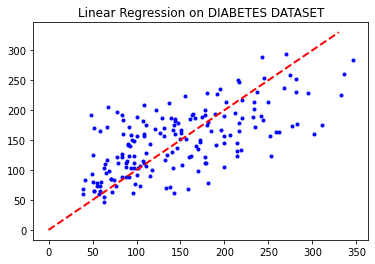

In [12]:
# Original data of X_test
expected=y_test

# plot graph of expected and predicted values

plt.title('Linear Regression on DIABETES DATASET')
plt.scatter(expected,predicted,c='b',marker='.',s=36)
plt.plot(np.linspace(0,330,100),np.linspace(0,330,100), '--r', linewidth=2)
plt.show()

## Practical 2: Logistic Regression (Iris Dataset)

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [80]:
# import the data
iris=datasets.load_iris()
X=iris.data[:,:2] # take only first 2 features
Y=iris.target


In [81]:
# create instance of logistics regression classifier and fit the data
logreg=LogisticRegression(C=1e5)
logreg.fit(X,Y)


LogisticRegression(C=100000.0)

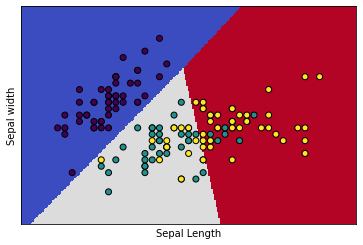

In [83]:
# Plot the decision boundary
x_min,x_max=X[:,0].min()-0.5,X[:,0].max()+0.5
y_min,y_max=X[:,1].min()-0.5,X[:,1].max()+0.5

# step size in the mesh
h=0.02
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=logreg.predict(np.c_[xx.ravel(),yy.ravel()])

# put the result into a color plot
Z=Z.reshape(xx.shape)

# plt.figure(figsize=(4,3))
plt.pcolormesh(xx,yy,Z,cmap='coolwarm')

# plot the training points.1111+f
plt.scatter(X[:,0],X[:,1],c=Y,edgecolors="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

plt.xticks(())
plt.yticks(())
plt.show()


# Extra

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    Returns
    
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    
    
    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


In [88]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

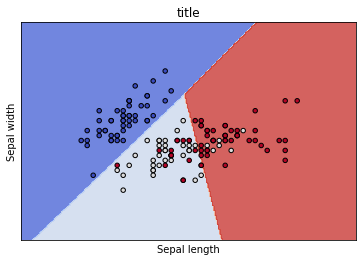

In [96]:

plot_contours(logreg, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
# plt.set_xlim(xx.min(), xx.max())
# plt.set_ylim(yy.min(), yy.max())
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xticks(())
plt.yticks(())
plt.title('title')

plt.show()